In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb

train=pd.read_csv('C:/Users/chaeh/train_features.csv')
train_labels=pd.read_csv('C:/Users/chaeh/train_labels.csv')
test=pd.read_csv('C:/Users/chaeh/test_features.csv')
submission=pd.read_csv('C:/Users/chaeh/sample_submission.csv')

In [29]:
train.shape, train_labels.shape, test.shape, submission.shape

((1875000, 8), (3125, 3), (469200, 8), (782, 62))

In [30]:
train.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [31]:
train[['id', 'time']].groupby('id').count()

,time
id,
0,600
1,600
2,600
3,600
4,600
...,...
3120,600
3121,600
3122,600


In [32]:
train[['id', 'time']].groupby('id').count()['time'].unique()

array([600], dtype=int64)

In [33]:
train_labels.head()

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise


In [34]:
test.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912


In [35]:
test[['id', 'time']].groupby('id').count()['time'].unique()

array([600], dtype=int64)

In [36]:
submission.head()

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
def plot_acc_id(df, id_num):
    return df.query('id == @id_num')[['time', 'acc_x', 'acc_y', 'acc_z']].plot(x = 'time')

def plot_gy_id(df, id_num):
    return df.query('id == @id_num')[['time', 'gy_x', 'gy_y', 'gy_z']].plot(x = 'time')

(-1.5, 1.5)

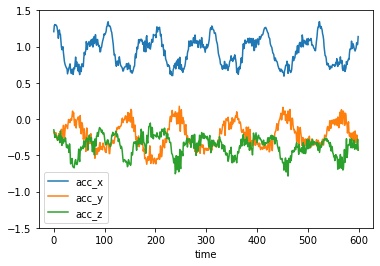

In [38]:
plot_acc_id(train, 0)
plt.ylim((-1.5, 1.5))

In [39]:
features = ['id', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z']
X_train = train[features].groupby('id').agg(['max', 'min', 'mean'])
X_test = test[features].groupby('id').agg(['max', 'min', 'mean'])

In [40]:
X_train.shape, X_test.shape

((3125, 18), (782, 18))

In [41]:
X_train.head()

acc_x                         acc_y                         acc_z  \
         max       min      mean       max       min      mean       max   
id                                                                         
0   1.344268  0.591940  0.931329  0.176871 -0.624113 -0.218471 -0.054876   
1   1.234020 -2.156208 -0.766580  0.700065 -1.295598 -0.317258  0.888661   
2   1.219836 -1.142847  0.039836  0.650645 -0.690990 -0.082403  1.332992   
3  -0.622250 -1.417751 -0.887702  0.283721 -0.540827 -0.087668  0.598814   
4   0.599720 -2.429109 -0.659018  1.724782 -2.055076 -0.337067  2.678034   

                              gy_x                               gy_y  \
         min      mean         max         min       mean         max   
id                                                                      
0  -0.786336 -0.370422   31.644123  -46.254836  -1.865269   69.847244   
1  -1.019531 -0.004223  286.624363 -325.328531  11.071600  389.608060   
2   0.073846  0.626012   73.525082 -164.779067  -8.472951  297.320834   
3  -0.257124  0.227357  192.765368  -69.419166  17.744167  159.083788   
4  -1.250483  0.202758  613.972600 -769.076518  -4.819638  284.952954   

                                gy_z                        
           min      mean         max         min      mean  
id                                                          
0   -85.887677 -3.359506   55.953827  -79.930029  1.182107  
1  -315.096003  1.740475  340.170199 -270.980823  1.393294  
2  -249.953944  0.597877   55.642836  -44.192071  3.053291  
3   -82.537304  4.800931   56.456908  -85.600536 -5.869898  
4  -243.909948  9.651713  221.015193 -270.581913  4.453382

In [42]:
y_train = train_labels['label']

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model = RandomForestClassifier(n_jobs=-1, random_state=0, min_samples_leaf=30)

In [45]:
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=30, n_jobs=-1, random_state=0)

In [46]:
y_pred = model.predict_proba(X_test)
y_pred

array([[0.00046875, 0.        , 0.0096776 , ..., 0.09720249, 0.        ,
        0.02924994],
       [0.00502501, 0.00017857, 0.00098451, ..., 0.00123188, 0.00032595,
        0.00454584],
       [0.00524984, 0.07220313, 0.00509058, ..., 0.        , 0.04459276,
        0.00616755],
       ...,
       [0.00682702, 0.        , 0.        , ..., 0.        , 0.00017544,
        0.00321907],
       [0.00062681, 0.01144735, 0.00271885, ..., 0.00111111, 0.00011494,
        0.00218582],
       [0.00422952, 0.        , 0.000404  , ..., 0.        , 0.        ,
        0.00359837]])

In [47]:
y_pred.shape

(782, 61)

In [48]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
submission.iloc[:,1:] = y_pred
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.000469,0.000000,0.009678,0.004174,0.000556,0.000000,0.000417,0.000682,0.002358,...,0.026422,0.001749,0.026730,0.001923,0.006362,0.001066,0.006539,0.097202,0.000000,0.029250
1,3126,0.005025,0.000179,0.000985,0.011026,0.005900,0.004217,0.000000,0.002306,0.000822,...,0.003941,0.000000,0.004798,0.000465,0.002357,0.001721,0.007898,0.001232,0.000326,0.004546
2,3127,0.005250,0.072203,0.005091,0.007657,0.001735,0.017769,0.044486,0.026042,0.013385,...,0.000000,0.000000,0.000250,0.032604,0.017082,0.135941,0.000000,0.000000,0.044593,0.006168
3,3128,0.007719,0.011906,0.024395,0.007141,0.000000,0.008391,0.000979,0.010883,0.001820,...,0.000280,0.000000,0.000290,0.001923,0.018211,0.003818,0.012675,0.000261,0.000000,0.029790
4,3129,0.005560,0.000000,0.000000,0.001394,0.003414,0.002681,0.000000,0.000000,0.002771,...,0.000000,0.000000,0.000167,0.000000,0.000000,0.000196,0.002437,0.000323,0.000372,0.000944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.001869,0.000123,0.000000,0.005676,0.056134,0.039877,0.001075,0.005149,0.001816,...,0.002635,0.000000,0.001964,0.000000,0.000116,0.007357,0.001869,0.000000,0.006053,0.001033
778,3903,0.003716,0.000000,0.000000,0.001131,0.002803,0.004030,0.000625,0.000392,0.001658,...,0.000200,0.000000,0.000000,0.000000,0.000000,0.002435,0.000621,0.000000,0.001330,0.000000
779,3904,0.006827,0.000000,0.000000,0.000927,0.002121,0.000464,0.000000,0.000135,0.001369,...,0.000167,0.000000,0.000526,0.000000,0.001367,0.000000,0.003379,0.000000,0.000175,0.003219
780,3905,0.000627,0.011447,0.002719,0.001328,0.000000,0.000419,0.173713,0.005677,0.006515,...,0.001620,0.000000,0.001766,0.035451,0.009887,0.006617,0.000000,0.001111,0.000115,0.002186


In [50]:
submission.to_csv('baseline_rf.csv', index=False)